In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_preparation_pcg import prepare_dataset
import seaborn as sns

# Data Preparation

In [7]:

class_name = 'Occupancy' #quello che vogliamo predirre

df = pd.read_csv('./data/trainingdata_2015-02-05.csv',parse_dates=['date'], index_col='date')
df.head()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 00:00:00,21.245,25.245,0.0,456.500000,0.003938,0
2015-02-05 00:01:00,21.245,25.245,0.0,458.500000,0.003938,0
2015-02-05 00:02:00,21.260,25.260,0.0,459.666667,0.003944,0
2015-02-05 00:03:00,21.245,25.245,0.0,464.000000,0.003938,0
2015-02-05 00:04:00,21.245,25.200,0.0,465.000000,0.003931,0


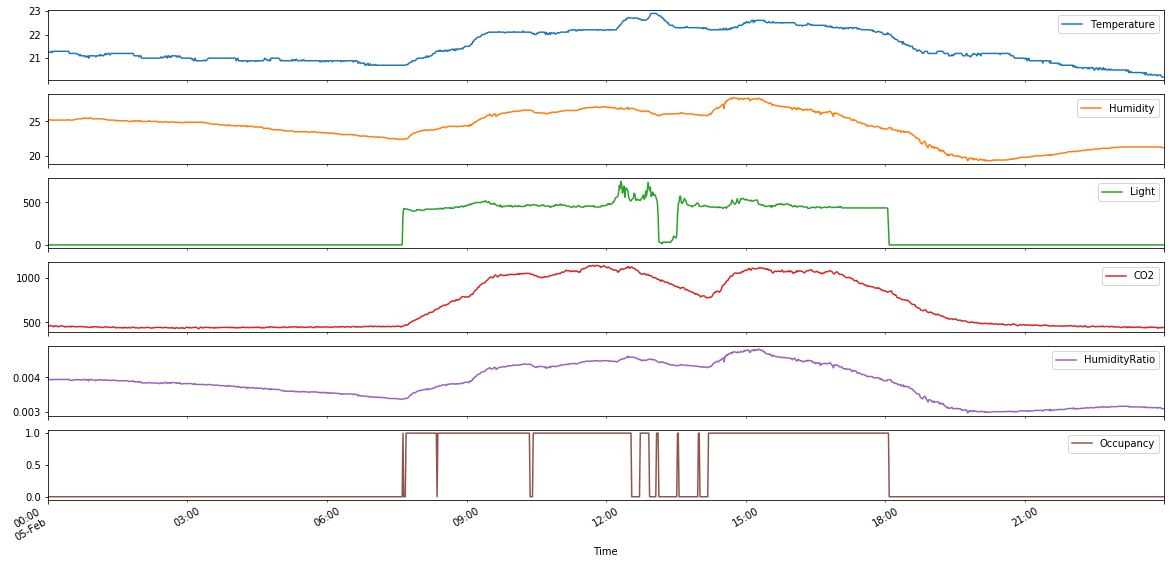

In [13]:
df.plot(subplots=True, figsize=(20, 10))
plt.xlabel("Time")
plt.savefig("/Users/piyush2017/Desktop/allfeatures.png")

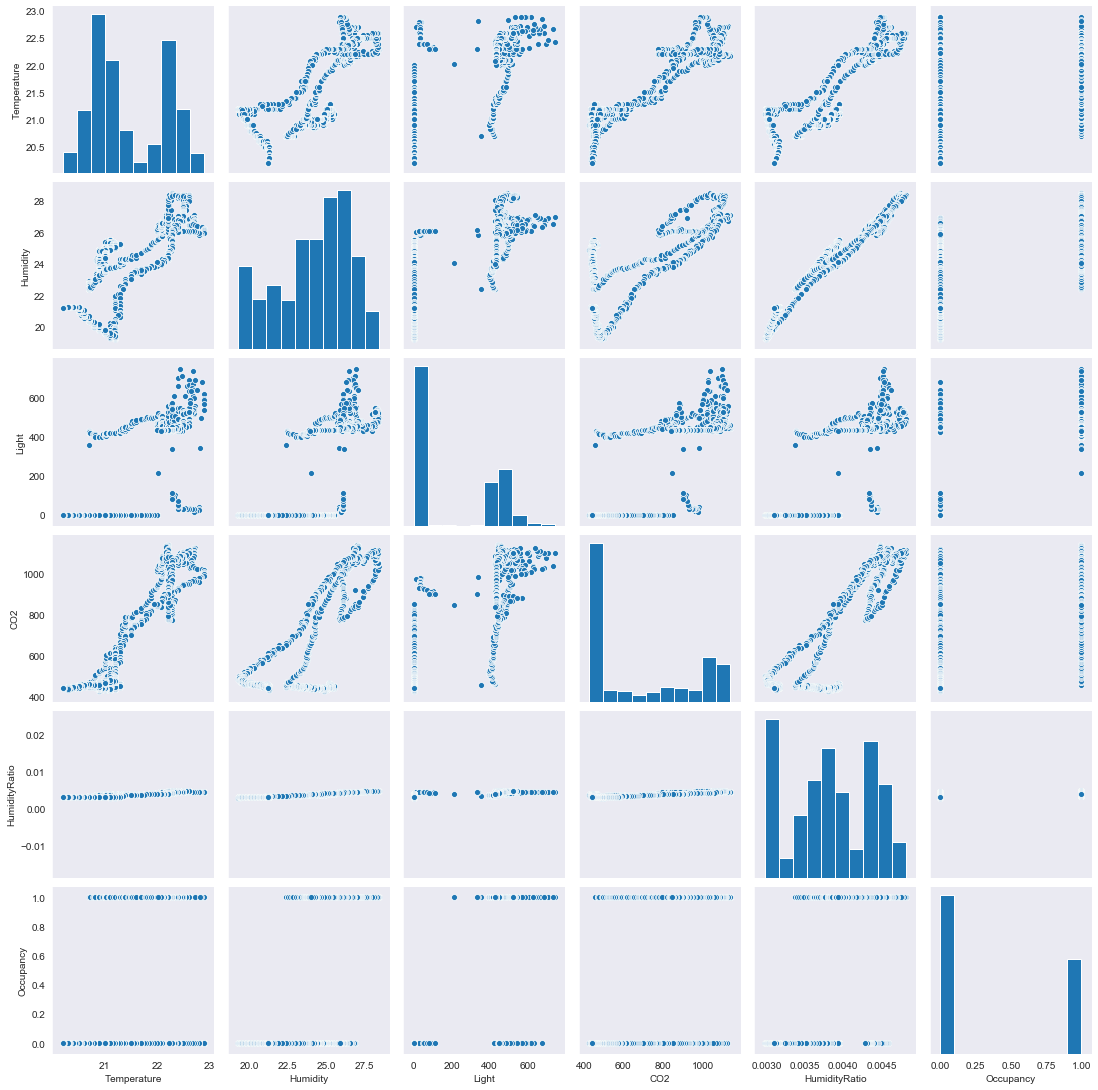

In [16]:
sns.set_style("dark")
sns.pairplot(df)

In [4]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

NameError: name 'df' is not defined

In [1]:
df.head()

NameError: name 'df' is not defined

In [16]:
def clearning_files(file_name, class_name = 'Occupancy'):
    """
    This fuction is cleaing the data:
        - add new column week day
        - remove date and number column
        
    """
    
    file = '/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/%s.csv'%file_name 
    df = pd.read_csv(file, skipinitialspace=True, na_values='?', keep_default_na=True, parse_dates=True)
    columns2remove = ['Number'] #eliminiamo perchè non ci servono
    df.drop(columns2remove, inplace=True, axis=1)
    res = prepare_dataset(df, class_name)
    df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
    df.to_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/preprocess%s.csv'%file_name,
             index = False) # here index is false because we don't want the column for index
    
    return df

In [12]:
clearning_files('datatrainingcopy')

In [18]:
def to_scale_data(df, class_name = 'Occupancy' ):
    """
    This is used to make scale the data.
    """
    
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()

    # here I am coverting to np and scaling the data to same value

    X_scaled = scaler.fit_transform(df[['Temperature', 'Humidity', 'Light', 
                                        'CO2', 'HumidityRatio']].values)

    # Here changing it to pd for export
    df01 = pd.DataFrame(data= X_scaled, columns=['Temperature', 'Humidity', 'Light',
                                                 'CO2', 'HumidityRatio'])
    df01['Week_day'] = df.Week_day
    df01['Occupancy'] = df.Occupancy

    #df01.to_csv("scaled_datatest2copy.csv")
    df01.head()
    
    return df01